#Set-up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install transformers

Mounted at /content/drive


In [ ]:
# set seeds
import random
import numpy as np
import torch

def set_seed(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)

set_seed(42)

# Plotting monosemanticity

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/SAEs_for_Genomics/Latent_dict_monosem_nt50m_sae_+40mtokens.csv'
df = pd.read_csv(path)
df['log_product'] = np.log(df['evidence_for_act_from_ann'] * df['evidence_for_ann_from_act'])
df['log_BF_for_act_from_ann'] = np.log(df['evidence_for_act_from_ann'])
df['log_BF_for_ann_from_act'] = np.log(df['evidence_for_ann_from_act'])
df

,latent_id,annotation,evidence_for_act_from_ann,evidence_for_ann_from_act,log_product,log_BF_for_act_from_ann,log_BF_for_ann_from_act
0,22,"{'hGH poly(A) signal', 'C9orf85'}",328.316296,540.841797,12.087104,5.793977,6.293127
1,28,"{'hGH poly(A) signal', 'C9orf85'}",518.568276,1649.694837,13.659417,6.251072,7.408346
2,52,{'LTR'},31.063051,28.715971,6.793473,3.436019,3.357453
3,73,{'small t antigen'},273.906144,332.068231,11.418126,5.612786,5.805340
4,74,{'C9orf85'},810.308421,1232.636828,13.814326,6.697415,7.116911
...,...,...,...,...,...,...,...
238,3997,{'hGH poly(A) signal'},211.129047,272.672839,10.960742,5.352470,5.608273
239,4031,"{'hGH poly(A) signal', 'C9orf85'}",412.402508,880.379018,12.802352,6.022000,6.780353
240,4035,{'hGH poly(A) signal'},234.379592,314.389970,11.207576,5.456942,5.750634
241,4056,"{'hGH poly(A) signal', 'C9orf85'}",288.106874,443.711025,11.758505,5.663332,6.095174


In [ ]:
# order df by log_product
df = df.sort_values('log_product', ascending=False)

# for each unique annotation, only keep the row with the highest log_product
df = df.groupby('annotation').apply(lambda x: x.nlargest(1, 'log_product')).reset_index(drop=True)
df

# rank by log product
df['rank'] = df['log_product'].rank(ascending=False)
df

#sample 20
df_top_20 = df.head(20)
df_top_20

<ipython-input-72-bafa19c8fd5f>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('annotation').apply(lambda x: x.nlargest(1, 'log_product')).reset_index(drop=True)


,latent_id,annotation,evidence_for_act_from_ann,evidence_for_ann_from_act,log_product,log_BF_for_act_from_ann,log_BF_for_ann_from_act,rank
0,719,{'AAV2 ITR'},117.227501,51.645875,8.708527,4.764117,3.944410,18.0
1,772,{'AmpR promoter'},34.071558,41.791817,7.261164,3.528463,3.732701,26.0
2,685,{'C9orf85'},1750.534979,10217.910547,16.699574,7.467677,9.231897,4.0
3,967,"{'CMV enhancer', 'CMV IE94 promoter'}",27.585843,64.113076,7.477951,3.317303,4.160648,23.0
4,1666,"{'CMV enhancer', 'CMV promoter'}",24.627723,70.862689,7.464617,3.203873,4.260744,24.0
5,2903,{'CMV enhancer'},71.952031,30.035782,7.678389,4.276000,3.402389,22.0
6,1413,"{'CMV promoter', 'UL126'}",27.060755,42.160927,7.039578,3.298085,3.741494,29.0
7,3182,{'CaMKII promoter'},796.136890,1833.796124,14.193915,6.679771,7.514143,7.0
8,1238,{'LTR'},48.534707,78.354112,8.243518,3.882279,4.361238,19.0
9,2492,{'LYS2'},1216.870894,1158.894374,14.159260,7.104038,7.055222,8.0


/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:354: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


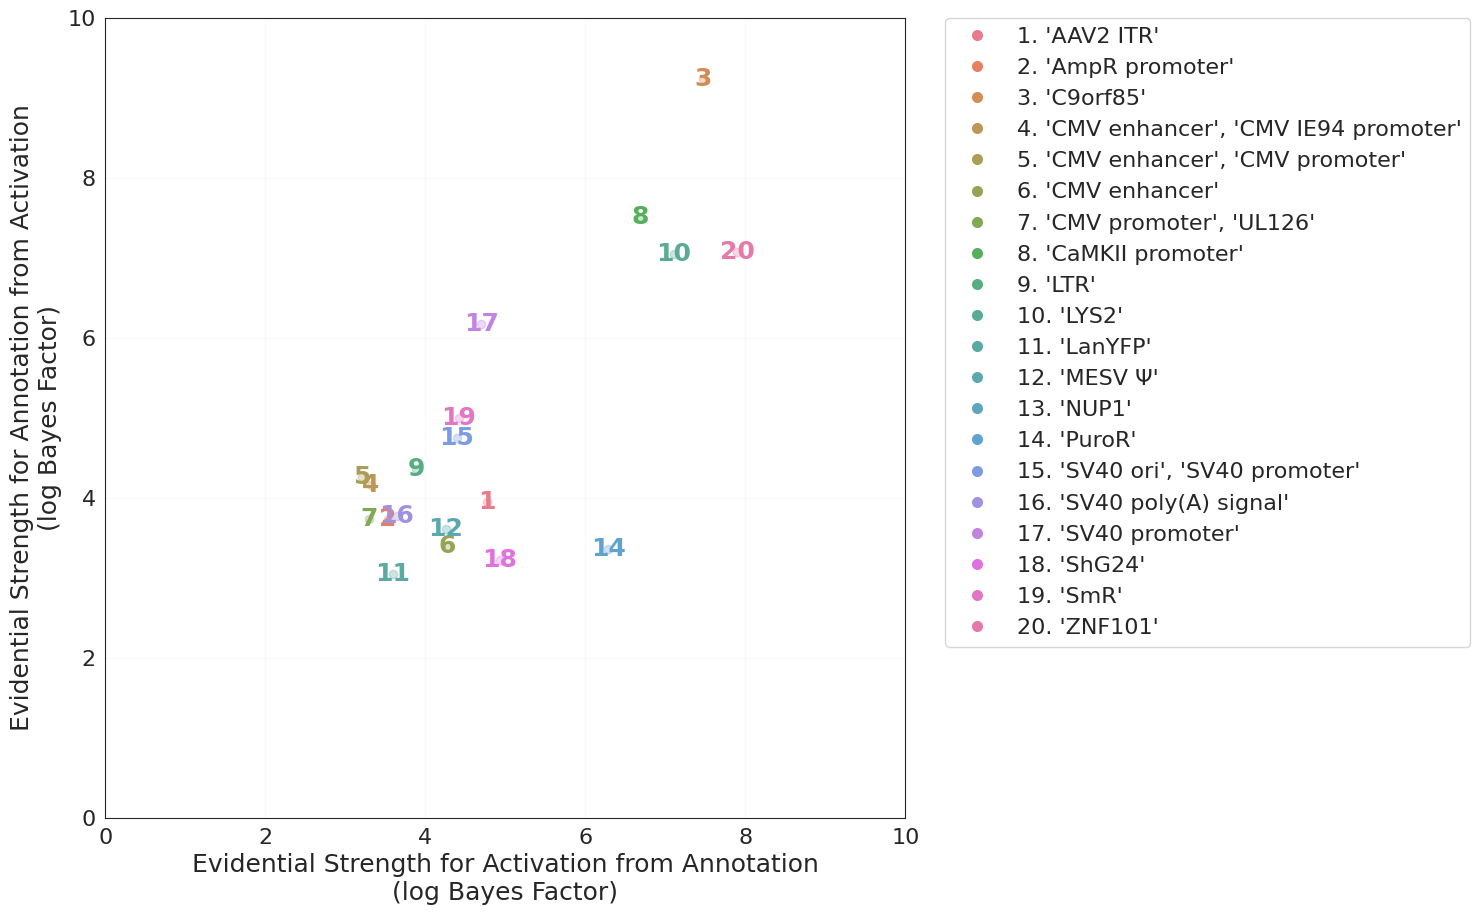

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

def set_global_font_size(font_size=18):
    plt.rcParams['font.size'] = font_size
    plt.rcParams['axes.titlesize'] = font_size + 2
    plt.rcParams['axes.labelsize'] = font_size
    plt.rcParams['xtick.labelsize'] = font_size - 2
    plt.rcParams['ytick.labelsize'] = font_size - 2
    plt.rcParams['legend.fontsize'] = font_size - 2

def plot_with_numbered_legend(df):
    set_global_font_size()
    sns.set_style("white")

    # Create figure and axis with specific size
    fig = plt.figure(figsize=(15, 10))
    # Create axes with specific dimensions [left, bottom, width, height]
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])  # Adjust these values to control plot size

    unique_annotations = df['annotation'].unique()
    n_colors = len(unique_annotations)
    palette = sns.husl_palette(n_colors, s=.7)

    for idx, (annotation, group) in enumerate(df.groupby('annotation')):
        color = palette[idx][:3]

        ax.scatter(group['log_BF_for_act_from_ann'],
                  group['log_BF_for_ann_from_act'],
                  c=[color],
                  alpha=0.3)

        for _, row in group.iterrows():
            ax.text(row['log_BF_for_act_from_ann'],
                   row['log_BF_for_ann_from_act'],
                   str(idx + 1),
                   color=color,
                   alpha=1,
                   fontweight='bold',
                   ha='center',
                   va='center')

    legend_elements = [plt.Line2D([0], [0],
                                 marker='o',
                                 color='w',
                                 markerfacecolor=palette[idx][:3],
                                 markersize=9,
                                 label=f"{idx + 1}. {ann.replace('{', '').replace('}', '')}")
                      for idx, ann in enumerate(unique_annotations)]

    ax.legend(handles=legend_elements,
             bbox_to_anchor=(1.05, 1),
             loc='upper left',
             borderaxespad=0.,
             ncol=1)

    setup_plot_basics(ax)

def setup_plot_basics(ax):
    ax.set_xlabel('Evidential Strength for Activation from Annotation\n(log Bayes Factor)')
    ax.set_ylabel('Evidential Strength for Annotation from Activation\n(log Bayes Factor)')
    ax.grid(True, alpha=0.1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')  # This ensures square plot

# Example usage:
plot_with_numbered_legend(df_top_20)

# Syntactic latents

In [ ]:
path = '/content/drive/MyDrive/SAEs_for_Genomics/Latent_dict_4MER_monosem_nt50m_sae_+40mtokens.csv'
df_kmer = pd.read_csv(path)
df_kmer['log_product'] = np.log(df_kmer['evidence_for_act_from_ann'] * df_kmer['evidence_for_ann_from_act'])

df_kmer = df_kmer.groupby('annotation').apply(lambda x: x.nlargest(1, 'log_product')).reset_index(drop=True)
df_kmer= df_kmer.sort_values('log_product', ascending=False)

df_kmer['log_BF_for_act_from_ann'] = np.log(df_kmer['evidence_for_act_from_ann'])
df_kmer['log_BF_for_ann_from_act'] = np.log(df_kmer['evidence_for_ann_from_act'])

df_kmer['F1'] = df_kmer['precision'] * df_kmer['recall'] * 2 / (df_kmer['precision'] + df_kmer['recall'])
df_kmer = df_kmer.sort_values('log_product', ascending=False)

df_kmer_top_ = df_kmer.head(20)

# filter out those where log BFs are in the range 4-7
df_kmer_top_small = df_kmer_top_[(df_kmer_top_['log_BF_for_act_from_ann'] > 4) & (df_kmer_top_['log_BF_for_act_from_ann'] < 7)]


<ipython-input-85-c3e6f36184cf>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_kmer = df_kmer.groupby('annotation').apply(lambda x: x.nlargest(1, 'log_product')).reset_index(drop=True)


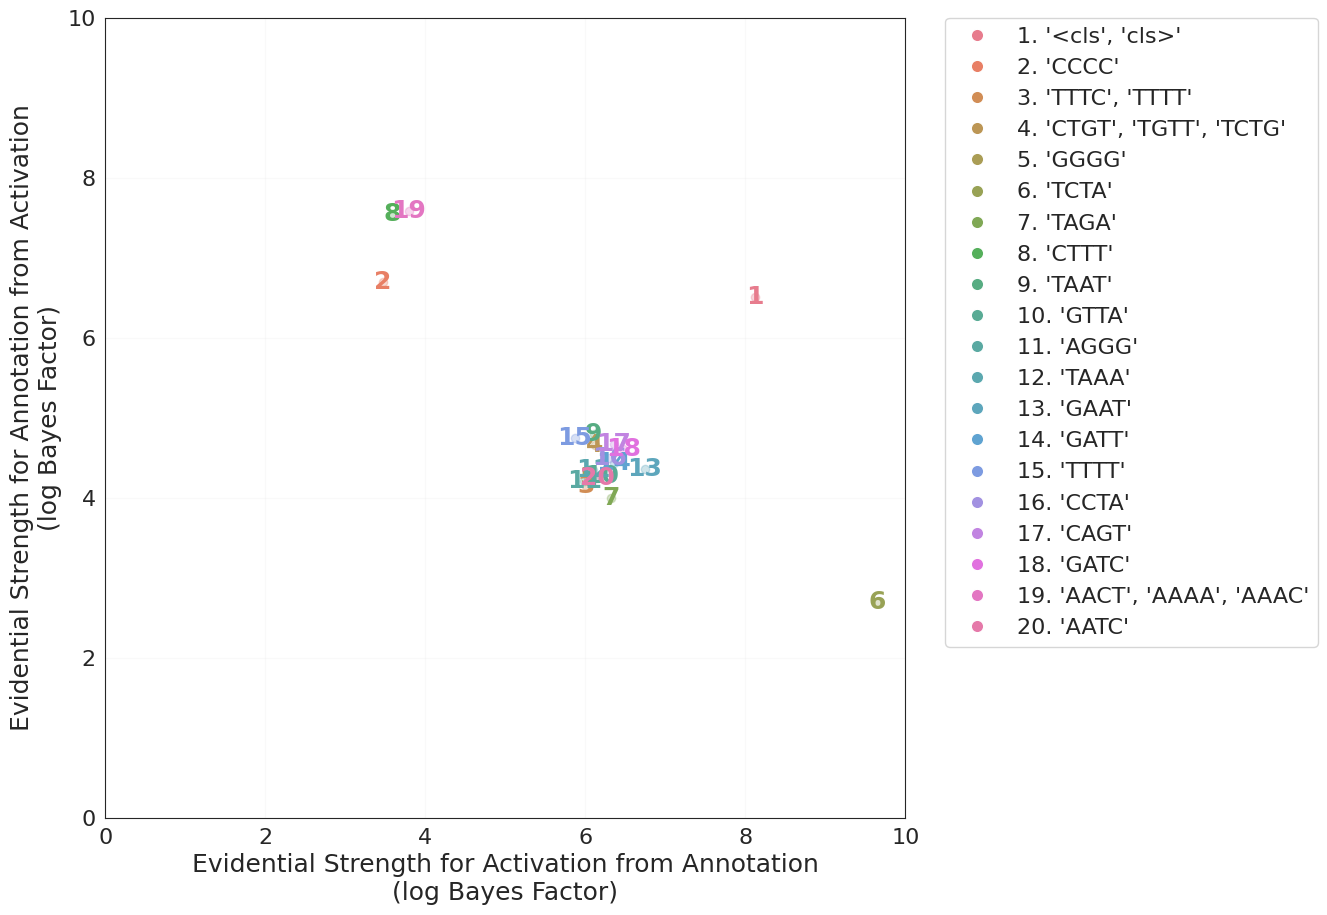

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

def set_global_font_size(font_size=18):
    plt.rcParams['font.size'] = font_size
    plt.rcParams['axes.titlesize'] = font_size + 2
    plt.rcParams['axes.labelsize'] = font_size
    plt.rcParams['xtick.labelsize'] = font_size - 2
    plt.rcParams['ytick.labelsize'] = font_size - 2
    plt.rcParams['legend.fontsize'] = font_size - 2

def plot_with_numbered_legend(df):
    set_global_font_size()
    sns.set_style("white")

    # Create figure and axis with specific size
    fig = plt.figure(figsize=(15, 10))
    # Create axes with specific dimensions [left, bottom, width, height]
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])  # Adjust these values to control plot size

    unique_annotations = df['annotation'].unique()
    n_colors = len(unique_annotations)
    palette = sns.husl_palette(n_colors, s=.7)

    for idx, (annotation, group) in enumerate(df.groupby('annotation')):
        color = palette[idx][:3]

        ax.scatter(group['log_BF_for_act_from_ann'],
                  group['log_BF_for_ann_from_act'],
                  c=[color],
                  alpha=0.3)

        for _, row in group.iterrows():
            ax.text(row['log_BF_for_act_from_ann'],
                   row['log_BF_for_ann_from_act'],
                   str(idx + 1),
                   color=color,
                   alpha=1,
                   fontweight='bold',
                   ha='center',
                   va='center')

    legend_elements = [plt.Line2D([0], [0],
                                 marker='o',
                                 color='w',
                                 markerfacecolor=palette[idx][:3],
                                 markersize=9,
                                 label=f"{idx + 1}. {ann.replace('{', '').replace('}', '')}")
                      for idx, ann in enumerate(unique_annotations)]

    ax.legend(handles=legend_elements,
             bbox_to_anchor=(1.05, 1),
             loc='upper left',
             borderaxespad=0.,
             ncol=1)

    setup_plot_basics(ax)

def setup_plot_basics(ax):
    ax.set_xlabel('Evidential Strength for Activation from Annotation\n(log Bayes Factor)')
    ax.set_ylabel('Evidential Strength for Annotation from Activation\n(log Bayes Factor)')
    ax.grid(True, alpha=0.1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')  # This ensures square plot

# Example usage:
plot_with_numbered_legend(df_kmer_top_)

# plotting?

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Define custom colors for each metric
color_dict = {
    'P(CMV|activation>t)': '#FF0000',    # Red
    'P(activation>t|CMV)': '#0000FF',    # Blue
    'P(CMV)': '#FFB3B3',                 # Light red
    'P(activation>t)': '#B3B3FF'         # Light blue
}

# Calculate statistics and prepare data for plotting
stats = [calculate_stats(token_df_copy, t) for t in range(0, 10)]
threshold_range = range(0, 10)

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Threshold': list(threshold_range) * 4,
    'Probability': (
        [s['above_threshold_tag'] for s in stats] +  # Precision
        [s['tag_positive'] for s in stats] +         # Recall
        [s['overall_tag'] for s in stats] +          # Feature presence
        [s['positive_activation'] for s in stats]     # Latent activation
    ),
    'Metric': (
        ['P(CMV|activation>t)'] * len(threshold_range) +
        ['P(activation>t|CMV)'] * len(threshold_range) +
        ['P(CMV)'] * len(threshold_range) +
        ['P(activation>t)'] * len(threshold_range)
    )
})

# Create the plot with custom colors
sns.lineplot(
    data=plot_data,
    x='Threshold',
    y='Probability',
    hue='Metric',
    marker='o',
    markersize=8,
    linewidth=2,
    palette=color_dict
)

# Set y-axis to log scale
##plt.yscale('log')

# Customize the plot
plt.title('Precision and Recall vs Activation of latent 2903 at Threshold T', fontsize=14, pad=20)
plt.xlabel('Activation Threshold (t)', fontsize=12)
plt.ylabel('Probability (log scale)', fontsize=12)

# Adjust legend
plt.legend(
    title='Metrics',
    title_fontsize=12,
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Set axis limits
plt.xlim(0, 9.2)
plt.ylim(bottom=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [ ]:
def calculate_extended_stats(df):
    current_stats = calculate_stats(df)

    check_cmv = lambda x: contains_annotation(x, 'CMV enhancer')


    # Calculate joint probabilities
    tag_present = df['tokens'].apply(contains_tag)
    activation_positive = df[latent_column] > act_threshold

    # Joint probability P(TAG and activation > threshold)
    joint_prob = (tag_present & activation_positive).mean()

    # Calculate mutual information
    p_tag = current_stats['overall_tag']
    p_act = current_stats['positive_activation']
    p_tag_given_act = current_stats['above_threshold_tag']
    p_act_given_tag = current_stats['tag_positive']

    # Negative cases
    p_no_tag_given_act = 1 - p_tag_given_act
    p_no_tag = 1 - p_tag
    p_no_act = 1 - p_act
    p_act_given_no_tag = (p_act - p_tag * p_act_given_tag) / p_no_tag

    # Mutual information
    mi = 0
    for x in [True, False]:
        px = p_tag if x else p_no_tag
        for y in [True, False]:
            py = p_act if y else p_no_act
            pxy = (joint_prob if (x and y) else
                  p_tag - joint_prob if (x and not y) else
                  p_act - joint_prob if (not x and y) else
                  1 - p_tag - p_act + joint_prob)
            if pxy > 0:
                mi += pxy * np.log2(pxy / (px * py))

    # Correlation coefficient (phi coefficient for binary variables)
    phi_coef = (joint_prob - p_tag * p_act) / np.sqrt(p_tag * p_act * (1-p_tag) * (1-p_act))

    # Add new statistics
    current_stats.update({
        'joint_probability': joint_prob,
        'mutual_information': mi,
        'phi_coefficient': phi_coef,
        'false_positive_rate': p_act_given_no_tag,
        'false_negative_rate': 1 - p_act_given_tag,
        'precision': joint_prob / p_act if p_act > 0 else 0,
        'recall': p_act_given_tag,
        'specificity': 1 - p_act_given_no_tag
    })

    return current_stats

# Updated printing
stats = calculate_extended_stats(token_df_copy)
print("\nTAG Token Analysis Results")
print("=" * 50)
print(f"Basic Probabilities:")
print(f" P(TAG):                                          {stats['overall_tag']:.3f}")
print(f" P(act > {act_threshold}):                        {stats['positive_activation']:.3f}")
print(f" P(TAG & act > {act_threshold}):                  {stats['joint_probability']:.3f}")

print("\nConditional Probabilities:")
print(f" P(TAG|act > {act_threshold}) [Precision]:        {stats['above_threshold_tag']:.3f}")
print(f" P(act > {act_threshold}|TAG) [Recall]:           {stats['tag_positive']:.3f}")
print(f" P(act > {act_threshold}|no TAG) [FPR]:          {stats['false_positive_rate']:.3f}")
print(f" P(act ≤ {act_threshold}|TAG) [FNR]:             {stats['false_negative_rate']:.3f}")

print("\nAssociation Metrics:")
#print(f" Mutual Information (bits):                       {stats['mutual_information']:.3f}") Unsure if correct!
#print(f" Phi Coefficient:                                 {stats['phi_coefficient']:.3f}") Unsure too!
print(f" BayesF (TAG → act):                             {evidence_for_tag_from_act:.3f}")
print(f" BayesF (act → TAG):                             {evidence_for_act_from_tag:.3f}")

TODO maybe move to utils.py

# Analyse logits for next/masked token

In [ ]:
def predict_next_tokens(sequence, model, tokenizer, top_k=5, mask_token=None):
    """
    Predict the most likely next/masked tokens for a given nucleotide sequence.

    Args:
        sequence (str): Input nucleotide sequence
        model: The loaded transformer model
        tokenizer: The loaded tokenizer
        top_k (int): Number of top predictions to return
        mask_token (str, optional): If provided, will predict for masked position instead of next token

    Returns:
        list: Top k predictions with their probabilities
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    with torch.no_grad():
        # If mask_token provided, insert it into sequence
        if mask_token:
            if mask_token not in sequence:
                raise ValueError("Mask token not found in sequence")
            input_sequence = sequence
        else:
            # For next token prediction, add mask to end
            input_sequence = sequence + tokenizer.mask_token

        # Tokenize input
        inputs = tokenizer(input_sequence, return_tensors="pt")
        inputs = {k: v.to(device) for k, v in inputs.items()}

        # Get model predictions
        outputs = model(**inputs)
        predictions = outputs.logits

        # Find mask token position
        mask_position = (inputs['input_ids'] == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

        if len(mask_position) == 0:
            raise ValueError("No mask token found in processed sequence")

        # Get probabilities for masked position
        mask_position = mask_position[-1].item()  # Take last mask if multiple
        probs = torch.nn.functional.softmax(predictions[0, mask_position], dim=-1)

        # Get top k predictions
        top_k_probs, top_k_indices = torch.topk(probs, top_k)

        # Convert to tokens and probabilities
        results = []
        for prob, idx in zip(top_k_probs.cpu().numpy(), top_k_indices.cpu().numpy()):
            token = tokenizer.decode([idx]).strip()
            results.append((token, float(prob)))

    return results

# Example usage
def print_predictions(sequence, model=model_nt, tokenizer=tokenizer_nt, top_k=5, mask_token=None):
    """Helper function to print predictions in a readable format"""
    print(f"\nInput sequence: {sequence}")
    predictions = predict_next_tokens(sequence, model, tokenizer, top_k, mask_token)
    print("\nTop predictions:")
    for i, (token, prob) in enumerate(predictions, 1):
        print(f"{i}. Token: '{token}' - Probability: {prob:.4f}")


# For next token prediction
sequence = seq[9]
print_predictions(sequence, top_k=10)
